In [2]:
# Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

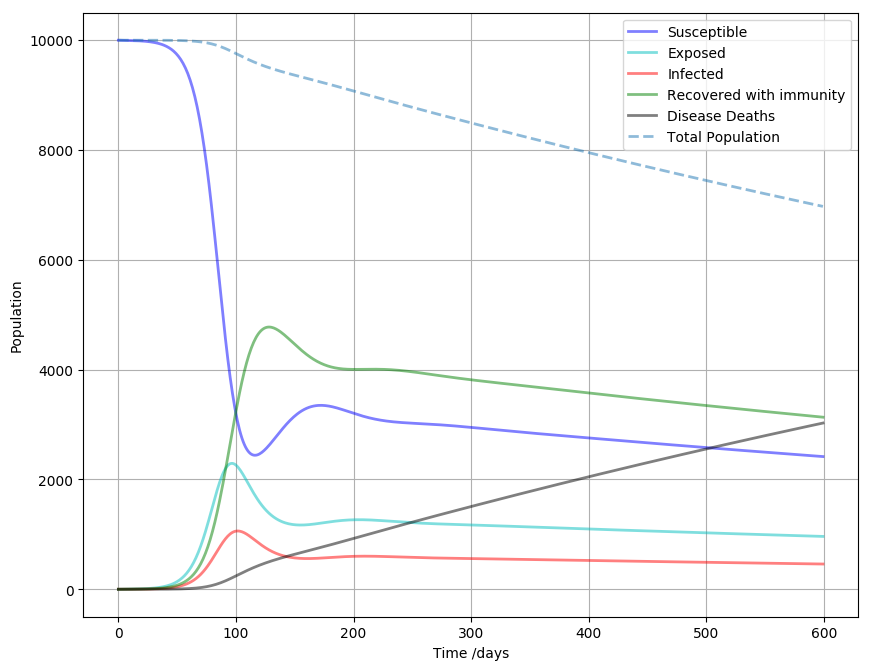

In [11]:
# Basic Parameters
days = 600
N = 10000
birth_rate = 0.0
death_rate = birth_rate

# Inital populations
I0, E0, R0, D0 = 1, 0, 0, 0
S0 = N - I0 - R0 - E0 - D0

# Disease Parameters
recovery_period = 5
reproduction_rate = 3
disease_death_rate = 0.01
E2I_rate = 0.1                    # Exposed to Infected rate
R2S_rate = 0.03                   # Recovered to Suscept rate

gamma = 1./recovery_period        # Represents rate of recovery
beta = gamma * reproduction_rate  # Represents how often a susep-infect contact spreads disease

# Timeline
t = range(days)

# Susceptible, Exposed, Infected, Recovered, Dead 
def basicSEIRD(y, t, birth_rate, nat_death_rate, beta, gamma, 
               E2I_rate, R2S_rate, disease_death_rate):
    
    # Unpack the Y vector
    S, E, I, R, D = y
    N = S + E + I + R        # New population, takes into account deaths and births of last day
    New_Pop = N * birth_rate # Number of new births
    
    # Natural Deaths in each bin
    Dead_S = S * nat_death_rate
    Dead_E = E * nat_death_rate
    Dead_I = I * nat_death_rate
    Dead_R = R * nat_death_rate
    
    # Disease Deaths (only for infected bin)
    Disease_Deaths = I * disease_death_rate
    
    # Population flow values
    S2E = beta * S * I / N
    E2I = E2I_rate * E
    I2R = gamma * I
    R2S = R2S_rate * R
    
    # Derivative calculations
    dSdt = -S2E + R2S + New_Pop - Dead_S 
    dEdt = S2E - E2I - Dead_E
    dIdt = E2I - I2R - Dead_I - Disease_Deaths
    dRdt = I2R - R2S - Dead_R 
    dDdt = Disease_Deaths
    
    return dSdt, dEdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, E0, I0, R0, D0

# Integrate the equations over the timeline, t.
args = (birth_rate, death_rate, beta, gamma, E2I_rate, R2S_rate, disease_death_rate)   # Parameters for solver
solutions = odeint(basicSEIRD, y0, t, args=args)

# Unpack solutions vector
S, E, I, R, D = solutions.T

# Total population vector
N = [S[i]+E[i]+I[i]+R[i] for i in range(days)]

# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.figure(facecolor='w', figsize=(10,8), dpi=100)

plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, E, 'c', alpha=0.5, lw=2, label='Exposed')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.plot(t, D, 'k', alpha=0.5, lw=2, label='Disease Deaths')
plt.plot(t, N, '--', alpha=0.5, lw=2, label='Total Population')

plt.xlabel('Time /days')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()